# Info

In [259]:
!pip install category_encoders
import pandas as pd
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
import numpy as np

In [260]:
df = pd.read_csv('/content/train.csv')
pd.set_option('display.max_columns', None)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [261]:
print(df['ExterQual'].unique())

['Gd' 'TA' 'Ex' 'Fa']


In [262]:
print(df['ExterCond'].unique())

['TA' 'Gd' 'Fa' 'Po' 'Ex']


In [263]:
test = pd.read_csv('/content/test.csv')
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,Hd

In [264]:
df = df.copy()
test = test.copy()

 - predict the final price of each home goal
 - linear reggression
 - ft engineering


Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable.

Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

Sale price is the target variable

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [266]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [267]:
df.value_counts('LotFrontage') # drop

,count
LotFrontage,
60.0,143
70.0,70
80.0,69
50.0,57
75.0,53
...,...
38.0,1
39.0,1
111.0,1


In [268]:
df['LotFrontage'].isnull().sum()

259

<Axes: >

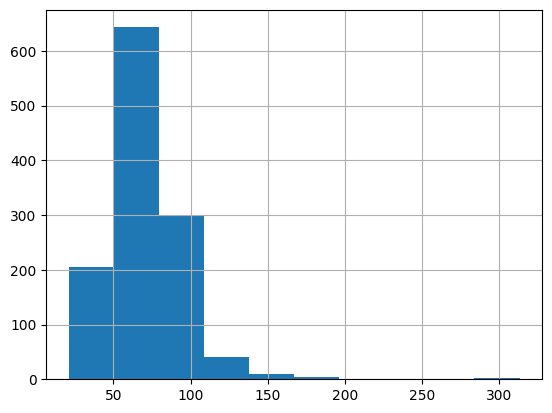

In [269]:
df['LotFrontage'].hist()

In [270]:
df.value_counts('Alley') # drop

,count
Alley,
Grvl,50
Pave,41


In [271]:
df.value_counts('MasVnrType')

,count
MasVnrType,
BrkFace,445
Stone,128
BrkCmn,15


In [272]:
df.value_counts('MasVnrArea')

,count
MasVnrArea,
0.0,861
180.0,8
108.0,8
72.0,8
16.0,7
...,...
254.0,1
255.0,1
258.0,1


In [273]:
df.value_counts('BsmtQual')

,count
BsmtQual,
TA,649
Gd,618
Ex,121
Fa,35


In [274]:
df.value_counts('BsmtCond')

,count
BsmtCond,
TA,1311
Gd,65
Fa,45
Po,2


In [275]:
df.value_counts('BsmtExposure')

,count
BsmtExposure,
No,953
Av,221
Gd,134
Mn,114


In [276]:
df.value_counts('BsmtFinType1')

,count
BsmtFinType1,
Unf,430
GLQ,418
ALQ,220
BLQ,148
Rec,133
LwQ,74


In [277]:
df.value_counts('BsmtFinType2')

,count
BsmtFinType2,
Unf,1256
Rec,54
LwQ,46
BLQ,33
ALQ,19
GLQ,14


In [278]:
df.value_counts('BsmtFinSF1')

,count
BsmtFinSF1,
0,467
24,12
16,9
20,5
936,5
...,...
559,1
556,1
554,1


In [279]:
df.value_counts(['BsmtExposure','BsmtFinType1'])

BsmtExposure  BsmtFinType1
No            Unf             345
              GLQ             188
              ALQ             150
Av            GLQ             110
No            BLQ             109
              Rec             107
Gd            GLQ              83
No            LwQ              54
Av            Unf              46
              ALQ              38
Mn            GLQ              37
              Unf              27
Gd            ALQ              18
Av            BLQ              16
Mn            BLQ              15
              Rec              15
              ALQ              14
Gd            Unf              11
              LwQ               8
              BLQ               8
              Rec               6
Mn            LwQ               6
Av            LwQ               6
              Rec               5
Name: count, dtype: int64

In [280]:
df.value_counts('Electrical')

,count
Electrical,
SBrkr,1334
FuseA,94
FuseF,27
FuseP,3
Mix,1


In [281]:
df.value_counts('Fireplaces')

,count
Fireplaces,
0,690
1,650
2,115
3,5


In [282]:
df.value_counts('FireplaceQu')

,count
FireplaceQu,
Gd,380
TA,313
Fa,33
Ex,24
Po,20


In [283]:
df.value_counts(['FireplaceQu', 'Fireplaces'])

FireplaceQu  Fireplaces
Gd           1             324
TA           1             259
Gd           2              54
TA           2              53
Fa           1              28
Po           1              20
Ex           1              19
             2               4
Fa           2               4
Gd           3               2
Ex           3               1
Fa           3               1
TA           3               1
Name: count, dtype: int64

In [284]:
df.value_counts('GarageCars')

,count
GarageCars,
2,824
1,369
3,181
0,81
4,5


In [285]:
df.value_counts('PoolArea')

,count
PoolArea,
0,1453
480,1
512,1
519,1
555,1
576,1
648,1
738,1


In [286]:
df.value_counts('PoolQC')

,count
PoolQC,
Gd,3
Ex,2
Fa,2


In [287]:
df.value_counts('Fence')

,count
Fence,
MnPrv,157
GdPrv,59
GdWo,54
MnWw,11


In [288]:
df.value_counts('MiscFeature')

,count
MiscFeature,
Shed,49
Gar2,2
Othr,2
TenC,1


In [289]:
df.duplicated().sum() # total of duplicates

0

# Imputation + dealing w null values

In [290]:
test['LotFrontage'].skew()

0.661921074378434

In [291]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].median())

In [292]:
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
test['MasVnrType'] = test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])

In [293]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

In [294]:
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtQual']

,BsmtQual
0,Gd
1,Gd
2,Gd
3,TA
4,Gd
...,...
1455,Gd
1456,Gd
1457,TA
1458,TA


In [295]:
test['BsmtQual'] = test['BsmtQual'].fillna('None')
test['BsmtQual']

,BsmtQual
0,TA
1,TA
2,Gd
3,TA
4,Gd
...,...
1454,TA
1455,TA
1456,TA
1457,Gd


In [296]:
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtCond']

,BsmtCond
0,TA
1,TA
2,TA
3,Gd
4,TA
...,...
1455,TA
1456,TA
1457,Gd
1458,TA


In [297]:
test['BsmtCond'] = test['BsmtCond'].fillna('None')
test['BsmtCond']

,BsmtCond
0,TA
1,TA
2,TA
3,TA
4,TA
...,...
1454,TA
1455,TA
1456,TA
1457,TA


In [298]:
df['BsmtCond'] = df['BsmtCond'].fillna('None')
print(df['BsmtCond'].isnull().sum())  # Should print 0

0


In [299]:
test['BsmtCond'].value_counts()

,count
BsmtCond,
TA,1295
Fa,59
Gd,57
None,45
Po,3


In [300]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')
df['BsmtFinType2']

,BsmtFinType2
0,Unf
1,Unf
2,Unf
3,Unf
4,Unf
...,...
1455,Unf
1456,Rec
1457,Unf
1458,Rec


In [301]:
test['BsmtFinType2'] = test['BsmtFinType2'].fillna('None')
test['BsmtFinType2']

,BsmtFinType2
0,LwQ
1,Unf
2,Unf
3,Unf
4,Unf
...,...
1454,Unf
1455,Unf
1456,Unf
1457,Unf


In [302]:
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
test['BsmtExposure'] = test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])

In [303]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna('None')

In [304]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
test['Electrical'] = test['Electrical'].fillna(test['Electrical'].mode()[0])

In [305]:
df['FireplaceQu'] =  df['FireplaceQu'].fillna('None')
df['FireplaceQu']

,FireplaceQu
0,None
1,TA
2,TA
3,Gd
4,TA
...,...
1455,TA
1456,TA
1457,Gd
1458,None


In [306]:
test['FireplaceQu'] =  test['FireplaceQu'].fillna('None')
test['FireplaceQu']

,FireplaceQu
0,None
1,None
2,TA
3,Gd
4,None
...,...
1454,None
1455,None
1456,TA
1457,None


In [307]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].median())

In [308]:
for column in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
  df[column] = df[column].fillna('None')

In [309]:
for column in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
  test[column] = test[column].fillna('None')

In [310]:
df['MiscFeature'] = df['MiscFeature'].fillna('None')
df['MiscFeature']

,MiscFeature
0,None
1,None
2,None
3,None
4,None
...,...
1455,None
1456,None
1457,Shed
1458,None


In [311]:
test['MiscFeature'] = test['MiscFeature'].fillna('None')
test['MiscFeature']

,MiscFeature
0,None
1,Gar2
2,None
3,None
4,None
...,...
1454,None
1455,None
1456,None
1457,Shed


In [312]:
test.value_counts('MSZoning')

,count
MSZoning,
RL,1114
RM,242
FV,74
C (all),15
RH,10


In [313]:
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])

In [314]:
# test['Utilities'] = test['Utilities'].fillna(test['Utilities'].mode()[0]) bc we will be ignoring this one


In [315]:
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])


In [316]:
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])


In [317]:
test['BsmtFinSF2'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF2'].median())
test['BsmtFinSF2']

,BsmtFinSF2
0,468.0
1,923.0
2,791.0
3,602.0
4,263.0
...,...
1454,0.0
1455,252.0
1456,1224.0
1457,337.0


In [318]:
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].median())
test['BsmtFinSF1']

,BsmtFinSF1
0,468.0
1,923.0
2,791.0
3,602.0
4,263.0
...,...
1454,0.0
1455,252.0
1456,1224.0
1457,337.0


In [319]:
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['TotalBsmtSF']

,TotalBsmtSF
0,882.0
1,1329.0
2,928.0
3,926.0
4,1280.0
...,...
1454,546.0
1455,546.0
1456,1224.0
1457,912.0


In [320]:
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0])


In [321]:
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0])


In [322]:
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])


In [323]:
test['Functional'] = test['Functional'].fillna(test['Functional'].mode()[0])
test['Functional']

,Functional
0,Typ
1,Typ
2,Typ
3,Typ
4,Typ
...,...
1454,Typ
1455,Typ
1456,Typ
1457,Typ


In [324]:
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mode()[0])

In [325]:
test['GarageArea'].isnull().sum()

1

In [326]:
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())
test['GarageArea']

,GarageArea
0,730.0
1,312.0
2,482.0
3,470.0
4,506.0
...,...
1454,0.0
1455,286.0
1456,576.0
1457,0.0


In [327]:
test['BsmtUnfSF'].skew()

0.919916339164844

In [328]:
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])


In [329]:
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].median())


In [330]:
df = df.drop(['Alley', 'PoolQC', 'Fence', 'Utilities'], axis=1)
test = test.drop(['Alley', 'PoolQC', 'Fence', 'Utilities'], axis=1)

In [331]:
len(df.columns)

77

In [332]:
len(test.columns)

76

In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [334]:
test.info() # this is less than 1 bc there is no header

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

# Feature Engineering

In [335]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['TotalSF']

,TotalSF
0,2566
1,2524
2,2706
3,2473
4,3343
...,...
1455,2600
1456,3615
1457,3492
1458,2156


In [336]:
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']
test['TotalSF']

,TotalSF
0,1778.0
1,2658.0
2,2557.0
3,2530.0
4,2560.0
...,...
1454,1638.0
1455,1638.0
1456,2448.0
1457,1882.0


In [337]:
df['TotalBathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))
df['TotalBathrooms']

,TotalBathrooms
0,3.5
1,2.5
2,3.5
3,2.0
4,3.5
...,...
1455,2.5
1456,3.0
1457,2.0
1458,2.0


In [338]:
test['TotalBathrooms'] = (test['FullBath'] + (0.5 * test['HalfBath']) + test['BsmtFullBath'] + (0.5 * test['BsmtHalfBath']))
test['TotalBathrooms']

,TotalBathrooms
0,1.0
1,1.5
2,2.5
3,2.5
4,2.0
...,...
1454,1.5
1455,1.5
1456,2.0
1457,1.5


In [339]:
df['TotalPorchSF'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])
df['TotalPorchSF']

,TotalPorchSF
0,61
1,298
2,42
3,307
4,276
...,...
1455,40
1456,349
1457,60
1458,478


In [340]:
test['TotalPorchSF'] = (test['OpenPorchSF'] + test['3SsnPorch'] + test['EnclosedPorch'] + test['ScreenPorch'] + test['WoodDeckSF'])
test['TotalPorchSF']

,TotalPorchSF
0,260
1,429
2,246
3,396
4,226
...,...
1454,0
1455,24
1456,474
1457,112


In [341]:
df['Age'] = df['YrSold'] - df['YearBuilt']
df['Age']

,Age
0,5
1,31
2,7
3,91
4,8
...,...
1455,8
1456,32
1457,69
1458,60


In [342]:
test['Age'] = test['YrSold'] - test['YearBuilt']
test['Age']

,Age
0,49
1,52
2,13
3,12
4,18
...,...
1454,36
1455,36
1456,46
1457,14


In [343]:
df['AgeRemod'] = df['YrSold'] - df['YearRemodAdd']
df['AgeRemod']

,AgeRemod
0,5
1,31
2,6
3,36
4,8
...,...
1455,7
1456,22
1457,4
1458,14


In [344]:
test['AgeRemod'] = test['YrSold'] - test['YearRemodAdd']
test['AgeRemod']

,AgeRemod
0,49
1,52
2,12
3,12
4,18
...,...
1454,36
1455,36
1456,10
1457,14


In [345]:
df['TotalQual_Cond'] = df['OverallQual'] + df['OverallCond']
df['TotalQual_Cond']

,TotalQual_Cond
0,12
1,14
2,12
3,12
4,13
...,...
1455,11
1456,12
1457,16
1458,11


In [346]:
test['TotalQual_Cond'] = test['OverallQual'] + test['OverallCond']
test['TotalQual_Cond']

,TotalQual_Cond
0,11
1,12
2,10
3,12
4,13
...,...
1454,11
1455,9
1456,12
1457,10


In [347]:
df = df.drop(columns=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'BsmtFullBath',
                      'BsmtHalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch',
                      'WoodDeckSF', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'OverallQual', 'OverallCond'])

In [348]:
test = test.drop(columns=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'BsmtFullBath',
                          'BsmtHalfBath', 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch',
                          'WoodDeckSF', 'YrSold', 'YearBuilt', 'YearRemodAdd', 'OverallQual', 'OverallCond'])


In [349]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolArea,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalBathrooms,TotalPorchSF,Age,AgeRemod,TotalQual_Cond
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,None,0,2,WD,Normal,208500,2566,3.5,61,5,5,12
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,0,None,0,5,WD,Normal,181500,2524,2.5,298,31,31,14
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,None,0,9,WD,Normal,223500,2706,3.5,42,7,6,12
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,BrkFace,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,None,0,2,WD,Abnorml,140000,2473,2.0,307,91,36,12
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,0,None,0,12,WD,Normal,250000,3343,3.5,276,8,8,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,GasA,Ex,Y,SBrkr,0,1647,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,None,0,8,WD,Normal,175000,2600,2.5,40,8,7,11
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,GasA,TA,Y,SBrkr,0,2073,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,0,None,0,2,WD,Normal,210000,3615,3.0,349,32,22,12
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,BrkFace,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,GasA,Ex,Y,SBrkr,0,2340,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,Shed,2500,5,WD,Normal,266500,3492,2.0,60,69,4,16
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,BrkFace,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,GasA,Gd,Y,FuseA,0,1078,2,1,Gd,5,Typ,0,None,Attchd,1950.0,Unf,1,240,TA,TA,Y,0,None,0,4,WD,Normal,142125,2156,2.0,478,60,14,11


In [350]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,PoolArea,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,TotalSF,TotalBathrooms,TotalPorchSF,Age,AgeRemod,TotalQual_Cond
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,468.0,270.0,GasA,TA,Y,SBrkr,0,896,2,1,TA,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,0,None,0,6,WD,Normal,1778.0,1.0,260,49,49,11
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,923.0,406.0,GasA,TA,Y,SBrkr,0,1329,3,1,Gd,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,0,Gar2,12500,6,WD,Normal,2658.0,1.5,429,52,52,12
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,791.0,137.0,GasA,Gd,Y,SBrkr,0,1629,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,0,None,0,3,WD,Normal,2557.0,2.5,246,13,12,10
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,602.0,324.0,GasA,Ex,Y,SBrkr,0,1604,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,0,None,0,6,WD,Normal,2530.0,2.5,396,12,12,12
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,263.0,1017.0,GasA,Ex,Y,SBrkr,0,1280,2,1,Gd,5,Typ,0,None,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,None,0,1,WD,Normal,2560.0,2.0,226,18,18,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,BrkFace,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,GasA,Gd,Y,SBrkr,0,1092,3,1,TA,5,Typ,0,None,None,1979.0,None,0.0,0.0,None,None,Y,0,None,0,6,WD,Normal,1638.0,1.5,0,36,36,11
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,CemntBd,CmentBd,BrkFace,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,252.0,294.0,GasA,TA,Y,SBrkr,0,1092,3,1,TA,6,Typ,0,None,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,None,0,4,WD,Abnorml,1638.0,1.5,24,36,36,9
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,1224.0,0.0,GasA,Ex,Y,SBrkr,0,1224,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,0,None,0,9,WD,Abnorml,2448.0,2.0,474,46,10,12
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,BrkFace,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,337.0,575.0,GasA,TA,Y,SBrkr,0,970,3,1,TA,6,Typ,0,None,None,1979.0,None,0.0,0.0,None,None,Y,0,Shed,700,7,WD,Normal,1882.0,1.5,112,14,14,10


# encoding

In [351]:
df.value_counts("MSZoning")

,count
MSZoning,
RL,1151
RM,218
FV,65
RH,16
C (all),10


In [352]:
df.value_counts("Street")  # one hot

,count
Street,
Pave,1454
Grvl,6


In [353]:
df.value_counts("LotShape")

,count
LotShape,
Reg,925
IR1,484
IR2,41
IR3,10


In [354]:
df.value_counts('LandContour')

,count
LandContour,
Lvl,1311
Bnk,63
HLS,50
Low,36


In [355]:
df.value_counts('LotConfig')

,count
LotConfig,
Inside,1052
Corner,263
CulDSac,94
FR2,47
FR3,4


In [356]:
df.value_counts('LandSlope')

,count
LandSlope,
Gtl,1382
Mod,65
Sev,13


In [357]:
df.value_counts('Neighborhood')

,count
Neighborhood,
NAmes,225
CollgCr,150
OldTown,113
Edwards,100
Somerst,86
Gilbert,79
NridgHt,77
Sawyer,74
NWAmes,73


In [358]:
df.value_counts('Condition1')

,count
Condition1,
Norm,1260
Feedr,81
Artery,48
RRAn,26
PosN,19
RRAe,11
PosA,8
RRNn,5
RRNe,2


In [359]:
df.value_counts('BldgType')

,count
BldgType,
1Fam,1220
TwnhsE,114
Duplex,52
Twnhs,43
2fmCon,31


In [360]:
df.value_counts('HouseStyle')

,count
HouseStyle,
1Story,726
2Story,445
1.5Fin,154
SLvl,65
SFoyer,37
1.5Unf,14
2.5Unf,11
2.5Fin,8


In [361]:
df.value_counts('ExterCond')

,count
ExterCond,
TA,1282
Gd,146
Fa,28
Ex,3
Po,1


In [362]:
df.value_counts('ExterQual')

,count
ExterQual,
TA,906
Gd,488
Ex,52
Fa,14


In [363]:
df.select_dtypes(include=['object']).columns.tolist()

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [364]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Total number of categorical variables: {len(categorical_cols)}")


Total number of categorical variables: 39


In [365]:
df['BsmtCond'].value_counts()

,count
BsmtCond,
TA,1311
Gd,65
Fa,45
None,37
Po,2


In [366]:
print(df['BsmtCond'].unique())

['TA' 'Gd' 'None' 'Fa' 'Po']


In [367]:
print(df['BsmtExposure'].unique()) # here impute to No then?

['No' 'Gd' 'Mn' 'Av']


In [368]:
print(df['GarageCond'].unique())

['TA' 'Fa' 'None' 'Gd' 'Po' 'Ex']


In [369]:
# Assuming df and test are already loaded
# Define ordinal features
ordinal_features = ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond']

# Modify the mapping dictionary to handle NaN values
mapping_dict = {
    'LotShape': {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1, np.nan: 0},
    'LandSlope': {'Gtl': 3, 'Mod': 2, 'Sev': 1, np.nan: 0},
    'ExterQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0},
    'ExterCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0},
    'BsmtQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'None': 1, np.nan: 0},
    'BsmtCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'None': 1, np.nan: 0},
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, np.nan: 0},
    'BsmtFinType1': {'GLQ': 7, 'ALQ': 6, 'BLQ': 5, 'Rec': 4, 'LwQ': 3, 'Unf': 2, 'None': 1, np.nan: 0},
    'BsmtFinType2': {'GLQ': 7, 'ALQ': 6, 'BLQ': 5, 'Rec': 4, 'LwQ': 3, 'Unf': 2, 'None': 1, np.nan: 0},
    'HeatingQC': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0},
    'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0},
    'FireplaceQu': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'None': 1, np.nan: 0},
    'GarageQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'None': 1, np.nan: 0},
    'GarageCond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'None': 1, np.nan: 0},
}

# Apply the mapping and handle NaNs for ordinal features
for feature in ordinal_features:
    df[feature] = df[feature].fillna(0).map(mapping_dict[feature])
    test[feature] = test[feature].fillna(0).map(mapping_dict[feature])

In [370]:
# Check for any remaining NaNs in the dataset after encoding
nan_columns = df.columns[df.isnull().any()]
print(f"Columns with NaNs after ordinal encoding: {nan_columns}")

Columns with NaNs after ordinal encoding: Index(['BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond'], dtype='object')


In [371]:
df['FireplaceQu'].skew()

0.23144088710892707

In [372]:
from sklearn.impute import SimpleImputer
import numpy as np

# Use the DataFrame df instead of the list X
X = df[['BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond']]

# Check skewness of each numeric column
skewed_columns = X.skew()

# Define a function to choose the imputation strategy
def choose_imputation_strategy(column_name, skew_value):
    if np.abs(skew_value) < 0.5:  # Less skewed, use mean
        return 'mean'
    else:  # More skewed, use median
        return 'median'

# Impute using different strategies based on skewness
imputer_dict = {}
for column in X.columns:
    strategy = choose_imputation_strategy(column, skewed_columns[column])
    imputer_dict[column] = SimpleImputer(strategy=strategy)

# Apply the imputers to the dataset
for column, imputer in imputer_dict.items():
    df[column] = imputer.fit_transform(df[[column]])


In [373]:
df['CentralAir'] = df['CentralAir'].map({'Y': 1, 'N': 0})
test['CentralAir'] = test['CentralAir'].map({'Y': 1, 'N': 0})


In [374]:
# target encoding = ['Neighborhood', 'Condition1', 'Condition2', 'Functional', 'MiscFeature']

target_cols = ['Neighborhood', 'Condition1', 'Condition2', 'Functional', 'MiscFeature']

for col in target_cols:
  target_encoder = ce.TargetEncoder(cols=[col])
  df[col] = target_encoder.fit_transform(df[col], df['SalePrice'])
  test[col] = target_encoder.transform(test[col])

In [375]:
# one hot encoding = ['MSZoning', 'Street', 'LandContour', 'LotConfig', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']

one_hot_cols = ['MSZoning', 'Street', 'LandContour', 'LotConfig', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition']

for features in one_hot_cols:
  one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
  encoded_feature = one_hot_encoder.fit_transform(df[[features]])
  encoded_feature_test = one_hot_encoder.transform(test[[features]])
  encoded_df = pd.DataFrame(encoded_feature, columns=one_hot_encoder.get_feature_names_out([features]))
  encoded_df_test = pd.DataFrame(encoded_feature_test,columns=one_hot_encoder.get_feature_names_out([features]))
  df = pd.concat([df, encoded_df], axis=1)
  test = pd.concat([test, encoded_df_test], axis=1)
  df.drop(columns=[features], inplace=True)
  test.drop(columns=[features], inplace=True)

In [376]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Total number of categorical variables: {len(categorical_cols)}")


Total number of categorical variables: 0


In [377]:
df['GarageYrBlt'].value_counts()

,count
GarageYrBlt,
1980.0,96
2005.0,65
2006.0,59
2004.0,53
2003.0,50
...,...
1900.0,1
1906.0,1
1908.0,1


In [378]:
# encode GarageYrBlt


In [379]:
test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 150 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    Id                     int64  
 1    MSSubClass             int64  
 2    LotFrontage            float64
 3    LotArea                int64  
 4    LotShape               int64  
 5    LandSlope              int64  
 6    Neighborhood           float64
 7    Condition1             float64
 8    Condition2             float64
 9    MasVnrArea             float64
 10   ExterQual              int64  
 11   ExterCond              int64  
 12   BsmtQual               int64  
 13   BsmtCond               float64
 14   BsmtExposure           int64  
 15   BsmtFinType1           int64  
 16   BsmtFinSF1             float64
 17   BsmtFinType2           int64  
 18   BsmtFinSF2             float64
 19   BsmtUnfSF              float64
 20   HeatingQC              int64  
 21   CentralAir             int64  
 22 

# predictions

### adding the k-fold validation

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [380]:
# # k-fold cross validation
# from sklearn.model_selection import KFold
# X = df.drop('SalePrice', axis=1)
# y = df['SalePrice']

# k = 5
# kf = KFold(n_splits=k, shuffle=True, random_state=1)

## XGBOOST

In [381]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

In [382]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [383]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [384]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_test, label=y_test)

In [385]:
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.01,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 1,
    'gamma': 0.1,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1,
    'seed': 42
}

In [386]:
num_boost_round = 5000
evallist = [(dval, 'eval'), (dtrain, 'train')]
model = xgb.train(params, dtrain, num_boost_round, evallist, early_stopping_rounds=50, verbose_eval=10)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	eval-rmse:81447.26787	train-rmse:77803.77937
[10]	eval-rmse:75432.43749	train-rmse:71121.82709
[20]	eval-rmse:69991.85709	train-rmse:64996.12181
[30]	eval-rmse:65087.17333	train-rmse:59378.63461
[40]	eval-rmse:60830.61983	train-rmse:54396.55387
[50]	eval-rmse:56909.76678	train-rmse:49846.44360
[60]	eval-rmse:53263.03425	train-rmse:45665.04839
[70]	eval-rmse:50196.80234	train-rmse:41877.78694
[80]	eval-rmse:47556.34803	train-rmse:38453.24046
[90]	eval-rmse:45246.00345	train-rmse:35315.33536
[100]	eval-rmse:42925.14679	train-rmse:32431.08128
[110]	eval-rmse:41127.33922	train-rmse:29823.35601
[120]	eval-rmse:39177.26768	train-rmse:27402.11787
[130]	eval-rmse:37700.33647	train-rmse:25250.09582
[140]	eval-rmse:36350.96144	train-rmse:23249.54259
[150]	eval-rmse:35185.31841	train-rmse:21461.93047
[160]	eval-rmse:34264.92280	train-rmse:19811.29836
[170]	eval-rmse:33297.99578	train-rmse:18318.06620
[180]	eval-rmse:32508.26081	train-rmse:16959.01428
[190]	eval-rmse:31705.34740	train-rmse:157

In [387]:
# Make predictions on the validation set
y_pred = model.predict(dval)

In [388]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(np.log(y_test), np.log(y_pred)))
print("Validation RMSE:", rmse)

Validation RMSE: 0.124348404443031


In [389]:
# Now you can use the trained model to predict on the test set
dtest = xgb.DMatrix(test)  # Assuming 'test' is your preprocessed test data
test_predictions = model.predict(dtest)

# submission

In [390]:
# Create submission file (assuming 'Id' is present in test_encoded)
submission_df = pd.DataFrame({'Id': test['Id'], 'SalePrice': test_predictions})
submission_df.to_csv('submission.csv', index=False)

notes:
Using all target encode and random forest w n_estimators=100:
- Score: 0.14406 from kaggle and
- Score: 0.13468219629231903 from collab

Using all target encode and XBOOST w n_estimators=100:
- Score: Validation RMSE: 0.13350617512869725 collab

